In [11]:

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
enhanced_news= pd.read_csv('/home/student/nlp-scraper/results/enhanced_news.csv')
enhanced_news['Topics'].unique()

array(['sport', 'entertainment', 'tech', 'politics', 'business'],
      dtype=object)

In [18]:
# enhanced_news.groupby('Date scraped')['URL'].count()
topic_counts = enhanced_news.groupby(['Date scraped', 'Topics']).size().reset_index(name='Count')

total_per_day = enhanced_news.groupby('Date scraped').size().reset_index(name='Total')

merged_df= pd.merge(topic_counts, total_per_day, on='Date scraped')
merged_df['proportion'] = merged_df['Count']/merged_df['Total']
# sns.histplot()

merged_df

,Date scraped,Topics,Count,Total,proportion
0,2025-01-23,business,15,106,0.141509
1,2025-01-23,entertainment,39,106,0.367925
2,2025-01-23,politics,36,106,0.339623
3,2025-01-23,sport,14,106,0.132075
4,2025-01-23,tech,2,106,0.018868
5,2025-01-24,business,17,97,0.175258
6,2025-01-24,entertainment,25,97,0.257732
7,2025-01-24,politics,33,97,0.340206
8,2025-01-24,sport,20,97,0.206186
9,2025-01-24,tech,2,97,0.020619


In [32]:
merged_df.to_csv("proportions.csv", index=False )

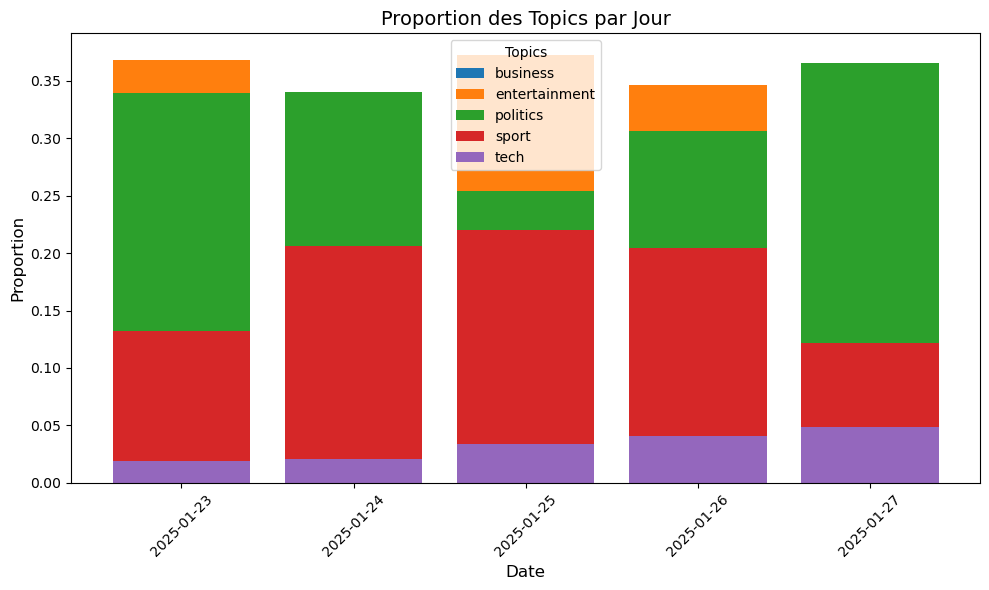

In [27]:

# Plot des proportions par topic pour chaque jour
fig, ax = plt.subplots(figsize=(10, 6))

# Créer un graphique en barres avec les proportions
for topic in merged_df['Topics'].unique():
    topic_data = merged_df[merged_df['Topics'] == topic]
    ax.bar(topic_data['Date scraped'], topic_data['proportion'], label=topic)

# Ajouter des titres et labels
ax.set_title('Proportion des Topics par Jour', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(title="Topics")

# Rotation des labels de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()